In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading and Cleaning the Data

In [3]:
mouse_plank = pd.read_csv("mouse_plank.csv")

In [4]:
mouse_plank.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Head Dips,Notes
0,6566,1/24/23,1,142,8,36,NaN
1,6570,1/24/23,1,91,0,17,NaN
2,6570,1/27/23,2,19,0,0,NaN
3,6570,1/27/23,3,120,6,23,mouse ends up at the start
4,6572,1/27/23,1,129,24,22,NaN


In [5]:
mouse_plank[["Transit Time (s)", "Footfall Errors"]].describe()

,Transit Time (s),Footfall Errors
count,58.000000,58.000000
mean,49.034483,3.568966
std,44.423783,3.996104
min,9.000000,0.000000
25%,18.250000,1.000000
50%,30.000000,2.000000
75%,67.500000,6.000000
max,194.000000,24.000000


In [6]:
def label_compression(row):
    if(row["Mouse ID"] in [6604, 6570, 6572, 6567, 6568, 6600, 7115]):
        return "Fast"
    elif(row["Mouse ID"] in [6566, 6601, 6599, 7059, 7067]):
        return "Slow"
    elif(row["Mouse ID"] == 6604):
        return "Neg control"

In [7]:
mouse_plank["Compression"] = mouse_plank.apply(label_compression, axis = 1)

In [8]:
mouse_plank.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Head Dips,Notes,Compression
0,6566,1/24/23,1,142,8,36,NaN,Slow
1,6570,1/24/23,1,91,0,17,NaN,Fast
2,6570,1/27/23,2,19,0,0,NaN,Fast
3,6570,1/27/23,3,120,6,23,mouse ends up at the start,Fast
4,6572,1/27/23,1,129,24,22,NaN,Fast


## Univariate Analysis

Text(10.142716049382715, 0.5, 'Count')

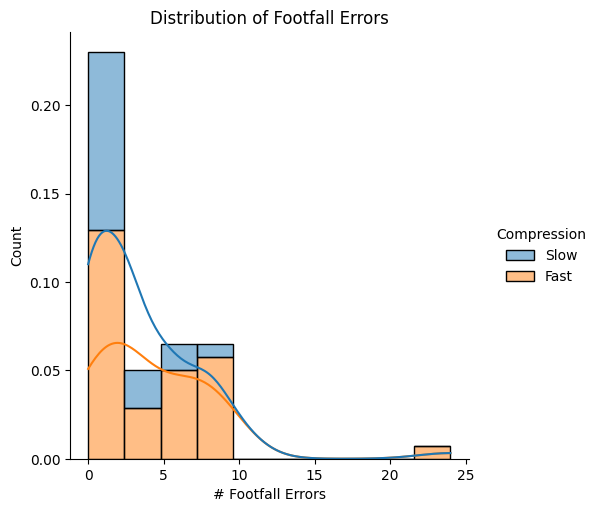

In [32]:
sns.displot(data = mouse_plank, x = "Footfall Errors", hue = "Compression", kde = True, multiple = "stack", stat = "density")
plt.title("Distribution of Footfall Errors")
plt.xlabel("# Footfall Errors")
plt.ylabel("Density")

According to this univariate graph, the mice with fast compression of their spinal cords tend to experience mroe footfall errors.

Text(1.3927160493827149, 0.5, 'Density')

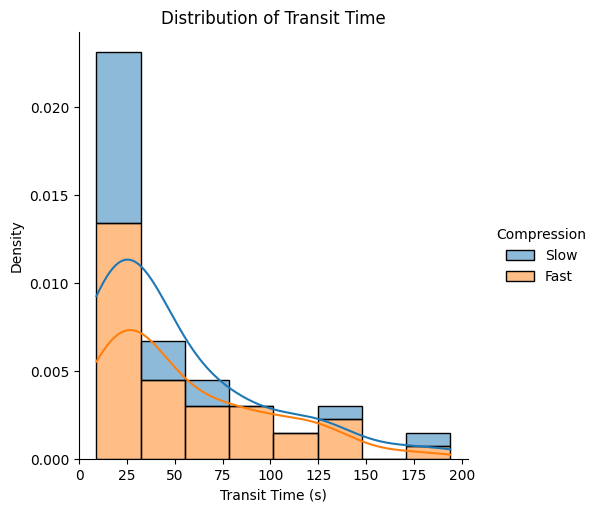

In [33]:
sns.displot(data = mouse_plank, x = "Transit Time (s)", hue = "Compression", kde = True, multiple = "stack", stat = "density")
plt.title("Distribution of Transit Time")
plt.xlabel("Transit Time (s)")
plt.ylabel("Density")

Similarly, mice with fast compression take a longer time to walk across the set of planks.

Text(10.142716049382715, 0.5, 'Density')

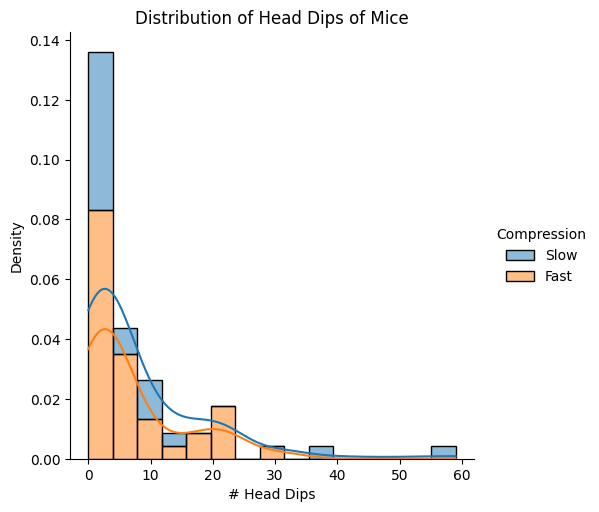

In [37]:
sns.displot(data = mouse_plank, x = "Head Dips", hue = "Compression", kde = True, multiple = "stack", stat = "density")
plt.title("Distribution of Head Dips of Mice")
plt.xlabel("# Head Dips")
plt.ylabel("Density")

As for the number of times that a mouse dips their head below a plank, mice with fast compression tend to experience more head dips, though there are outlier mice with slow compression that have many head dips.

Text(13.819444444444445, 0.5, 'Count')

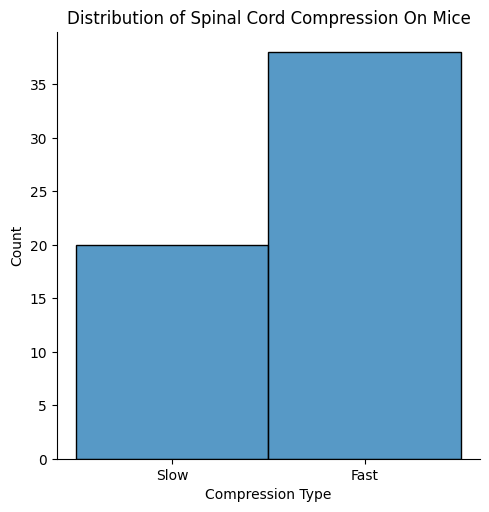

In [12]:
sns.displot(data = mouse_plank, x = "Compression")
plt.title("Distribution of Spinal Cord Compression On Mice")
plt.xlabel("Compression Type")
plt.ylabel("Count")

Overall, most of the trials involved mice with fast compression than those with slow compression.

## Multivariate Analysis

Text(0.5, 1.0, 'Heatmap of Numerical Variables')

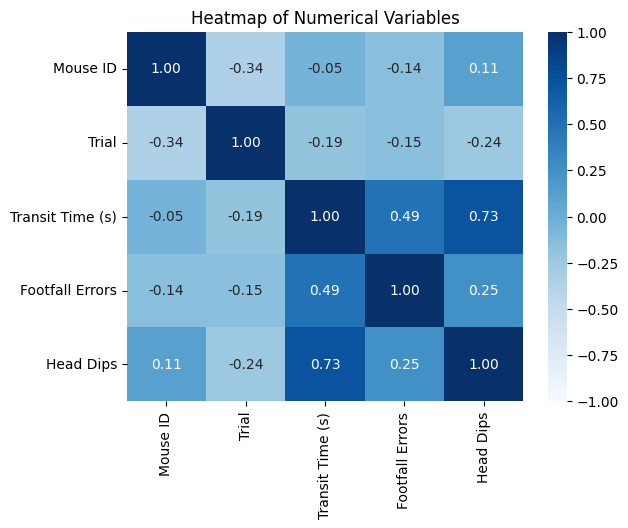

In [39]:
sns.heatmap(mouse_plank.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, fmt=".2f", cmap = "Blues")
plt.title("Heatmap of Numerical Variables")

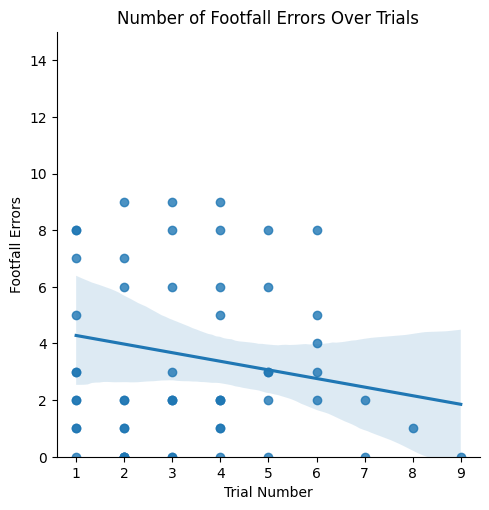

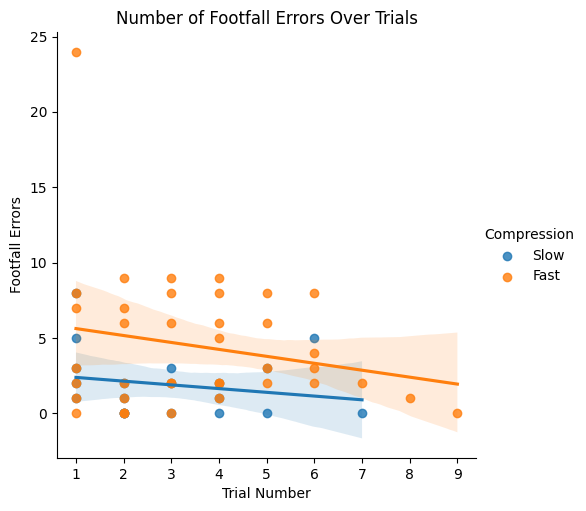

In [46]:
#plt.scatter(mouse_plank["Trial"], mouse_plank["Footfall Errors"])
sns.lmplot(x = "Trial", y="Footfall Errors", data=mouse_plank)
plt.title("Number of Footfall Errors Over Trials")
plt.ylim(0, 15)
plt.xlabel("Trial Number")
plt.ylabel("Footfall Errors")
sns.lmplot(x = "Trial", y="Footfall Errors", hue = "Compression", data=mouse_plank)
plt.xlabel("Trial Number")
plt.title("Number of Footfall Errors Over Trials")
plt.show()

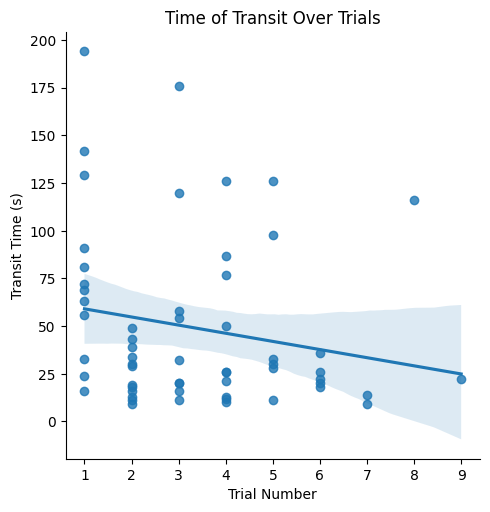

In [15]:
sns.lmplot(x = "Trial", y="Transit Time (s)", data=mouse_plank)
plt.title("Time of Transit Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Transit Time (s)")
plt.show()

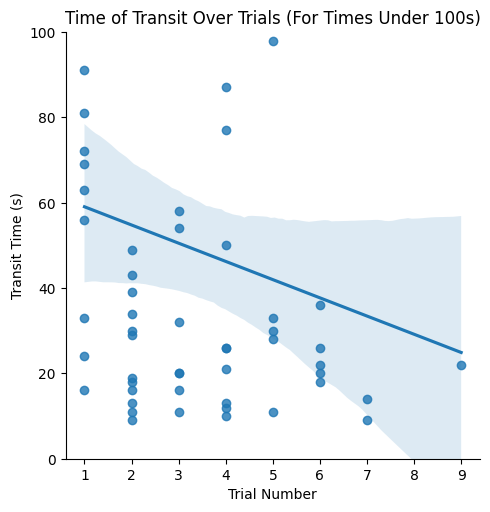

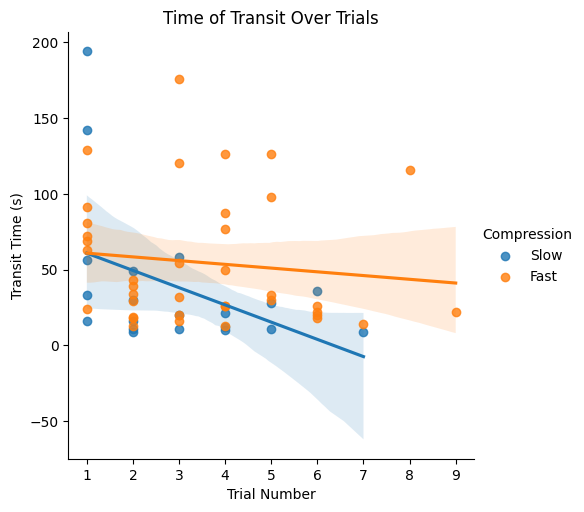

In [47]:
sns.lmplot(x = "Trial", y="Transit Time (s)", data=mouse_plank)
plt.xlabel("Trial Number")
plt.ylabel("Transit Time (s)")
plt.title("Time of Transit Over Trials (For Times Under 100s)")

# Focus on transit times under 100 seconds
plt.ylim(0, 100)

sns.lmplot(x = "Trial", y="Transit Time (s)", hue = "Compression", data=mouse_plank)
plt.xlabel("Trial Number")
plt.title("Time of Transit Over Trials")
plt.show()

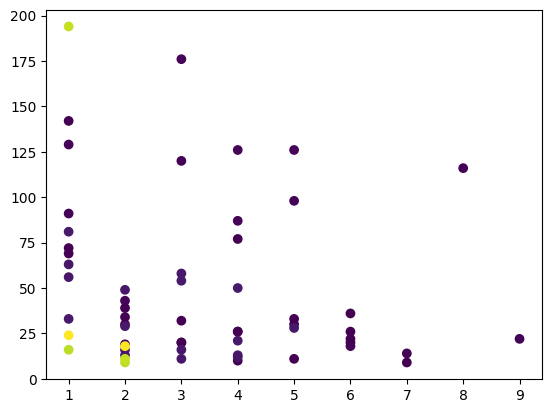

In [17]:
plt.scatter(mouse_plank["Trial"], mouse_plank["Transit Time (s)"], 
            c = mouse_plank["Mouse ID"], cmap = "viridis")

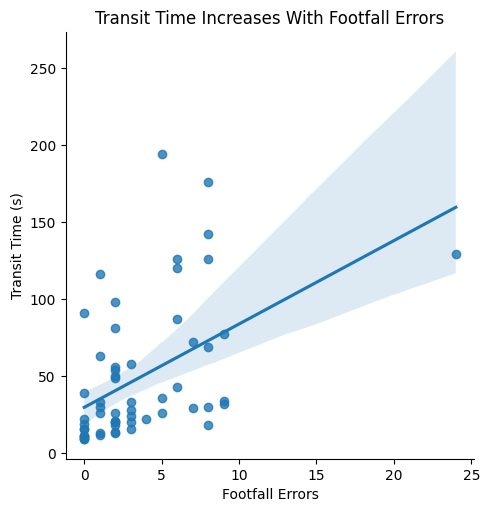

In [18]:
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", data=mouse_plank)
plt.title("Transit Time Increases With Footfall Errors")
plt.show()

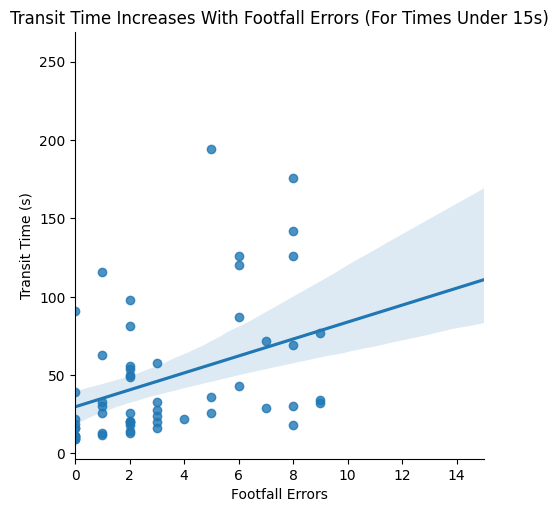

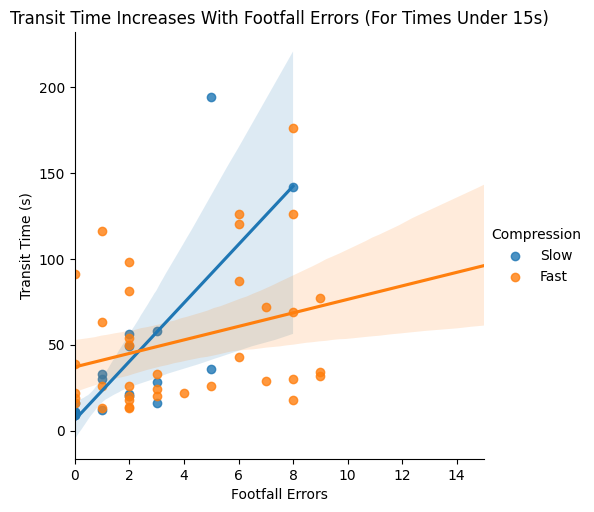

In [43]:
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", data=mouse_plank)
plt.title("Transit Time Increases With Footfall Errors (For Times Under 15s)")
plt.xlim(0, 15)
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", hue = "Compression", data=mouse_plank)
plt.title("Transit Time Increases With Footfall Errors (For Times Under 15s)")
plt.xlim(0, 15)
plt.show()

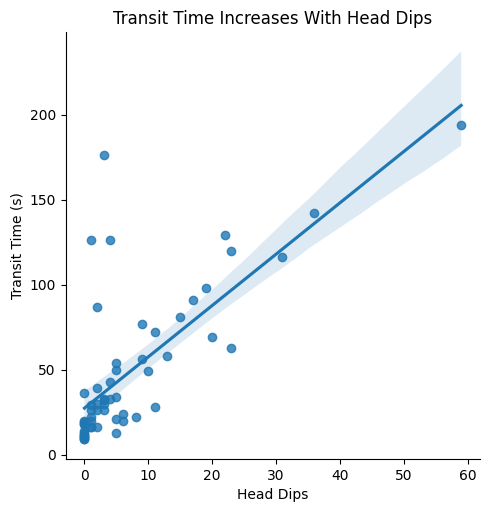

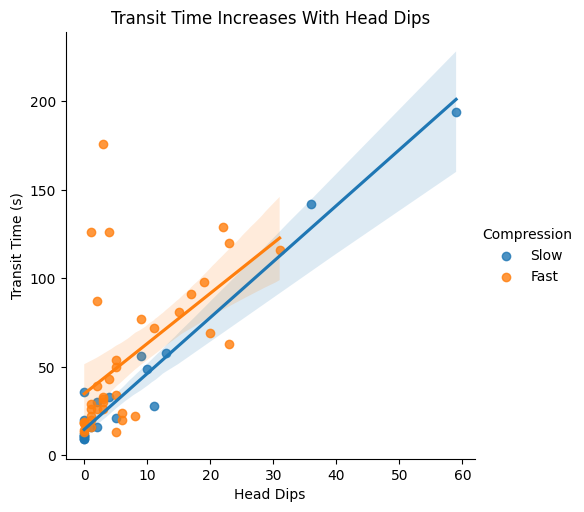

In [44]:
sns.lmplot(x = "Head Dips", y="Transit Time (s)", data=mouse_plank)
plt.title("Transit Time Increases With Head Dips")
sns.lmplot(x = "Head Dips", y="Transit Time (s)", hue = "Compression", data=mouse_plank)
plt.title("Transit Time Increases With Head Dips")
plt.show()

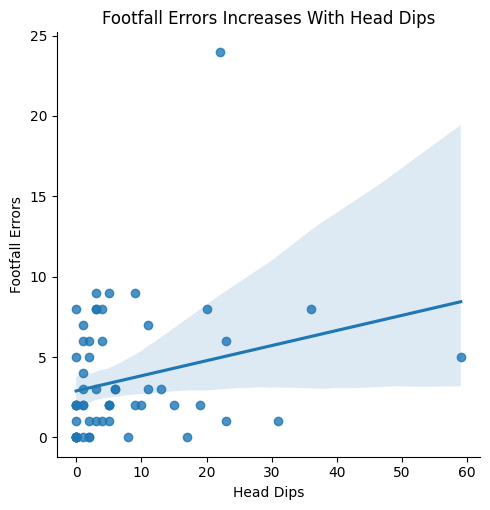

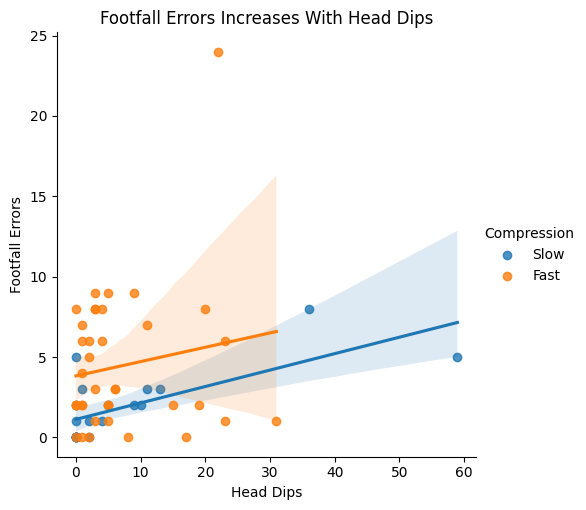

In [45]:
sns.lmplot(x = "Head Dips", y="Footfall Errors", data=mouse_plank)
plt.title("Footfall Errors Increases With Head Dips")
sns.lmplot(x = "Head Dips", y="Footfall Errors", hue = "Compression", data=mouse_plank)
plt.title("Footfall Errors Increases With Head Dips")
plt.show()

## Developing a Model

### Linear Regression

In [22]:
compression_dummies = pd.get_dummies(mouse_plank["Compression"]).iloc[:,0]

In [23]:
compression_df = pd.concat([mouse_plank, compression_dummies], axis = 1)
compression_df = compression_df.drop("Compression", axis = 1)
compression_df["Fast"] = compression_df["Fast"].astype(int)
compression_df = compression_df.rename(columns = {"Fast":"Compression"})
compression_df.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Head Dips,Notes,Compression
0,6566,1/24/23,1,142,8,36,NaN,0
1,6570,1/24/23,1,91,0,17,NaN,1
2,6570,1/27/23,2,19,0,0,NaN,1
3,6570,1/27/23,3,120,6,23,mouse ends up at the start,1
4,6572,1/27/23,1,129,24,22,NaN,1


In [24]:
# Imports
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

In [25]:
X = compression_df.drop(["Compression", "Date", "Notes"], axis = 1).values
y = compression_df["Compression"].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# Create a KFold object for cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 30)

# Instantiate a linear regression model
linreg = LinearRegression()

# Fit the data
linreg.fit(X, y)

# Predict the data
predictions = linreg.predict(X_test)

# Returns r-squared value
linreg.score(X_test, y_test)

0.14305971622756797

In [26]:
# Returns mean squared error
mean_squared_error(y_test, predictions, squared=False)

0.456381525426089

### Cross-Validation

In [27]:
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring = "neg_mean_squared_error")

# Find training RMSE to evaluate cross-validation performance
print(np.mean(np.sqrt(-linreg_cv)), np.std(np.sqrt(-linreg_cv)))

0.5377446285682496 0.14687261946992397


Here, I created a linear regression model to represent the mouse plank data. More specifically, I performed supervised learning to predict whether a mouse experienced slow or fast compression of its spinal cord. An RMSE value of 0.537 implies that a linear regression fits the data.

### Regularization (to avoid overfitting)

In [28]:
from sklearn.linear_model import Ridge, Lasso
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.predict(X_test)
  ridge_scores.append(ridge.score(X_test, y_test))
    
print(ridge_scores)

[0.08536022039993929, 0.08550097674278057, 0.0866415843034316, 0.08602945581166155, 0.045502505480845334, -0.006239411672785966]


In [29]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_

print(lasso_coef)

train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

[-0.00054917  0.          0.00228578  0.0205329  -0.00829893]
The train score for ls model is 0.1489299873636264
The test score for ls model is 0.12883054934103766
